In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('El solo Nigel').getOrCreate()

In [ ]:
sparkmaster = SparkSession.builder.master('local[*]').appName('El solo Nigel').getOrCreate()

In [ ]:
spark

In [ ]:
spark.version

'3.5.2'

In [ ]:
import time
start_time = time.time()

df1 = spark.read.option('header','true').csv('/content/Airbnb_Open_Data.csv', inferSchema=True)

In [ ]:
df1.show()

+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-------+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+-------+
|     id|                NAME|    host id|host_identity_verified|host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|  price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|license|
+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-

In [ ]:
df1.dtypes

[('id', 'string'),
 ('NAME', 'string'),
 ('host id', 'string'),
 ('host_identity_verified', 'string'),
 ('host name', 'string'),
 ('neighbourhood group', 'string'),
 ('neighbourhood', 'string'),
 ('lat', 'string'),
 ('long', 'string'),
 ('country', 'string'),
 ('country code', 'string'),
 ('instant_bookable', 'string'),
 ('cancellation_policy', 'string'),
 ('room type', 'string'),
 ('Construction year', 'string'),
 ('price', 'string'),
 ('service fee', 'string'),
 ('minimum nights', 'string'),
 ('number of reviews', 'string'),
 ('last review', 'string'),
 ('reviews per month', 'string'),
 ('review rate number', 'string'),
 ('calculated host listings count', 'double'),
 ('availability 365', 'string'),
 ('house_rules', 'string'),
 ('license', 'string')]

In [ ]:
df1.printSchema()

root
 |-- id: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- host id: string (nullable = true)
 |-- host_identity_verified: string (nullable = true)
 |-- host name: string (nullable = true)
 |-- neighbourhood group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- country: string (nullable = true)
 |-- country code: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- room type: string (nullable = true)
 |-- Construction year: string (nullable = true)
 |-- price: string (nullable = true)
 |-- service fee: string (nullable = true)
 |-- minimum nights: string (nullable = true)
 |-- number of reviews: string (nullable = true)
 |-- last review: string (nullable = true)
 |-- reviews per month: string (nullable = true)
 |-- review rate number: string (nullable = true)
 |-- calculated host listings count

In [ ]:
df1.count()

102998

In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show()


+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+-----------+-------+
| id|NAME|host id|host_identity_verified|host name|neighbourhood group|neighbourhood|lat|long|country|country code|instant_bookable|cancellation_policy|room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|house_rules|license|
+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+----------------------

In [ ]:
df1 = df1.drop('license')

In [ ]:
df1.select('country code').distinct().count()
df1.select('country code').distinct().show()


+-------------+
| country code|
+-------------+
|        FALSE|
|         TRUE|
|United States|
|           US|
|    -74.00828|
|    Manhattan|
|    -73.99986|
|    -73.98714|
|    -74.00711|
|    -73.86757|
|         NULL|
+-------------+



In [ ]:
df1.select('country').distinct().count()
df1.select('country').distinct().show()

+-------------+
|      country|
+-------------+
|    -73.95777|
|     40.57453|
|    -73.95179|
|United States|
|    -73.94639|
|    -73.94861|
|           US|
|    -74.00244|
|     40.71509|
|    -73.90783|
|       Howard|
|     40.72021|
|     40.86522|
|    -73.90079|
|    -73.95562|
|     40.57607|
|    -73.88614|
|    -73.94376|
|    -73.96005|
|         NULL|
+-------------+



In [ ]:
df1 = df1.filter(df1['country'] == 'United States')
df1 = df1.filter(df1['country code'] == 'US')


In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show()


+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+-----------+
| id|NAME|host id|host_identity_verified|host name|neighbourhood group|neighbourhood|lat|long|country|country code|instant_bookable|cancellation_policy|room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|house_rules|
+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+-------

In [ ]:
df1.show()

+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-------+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|     id|                NAME|    host id|host_identity_verified|host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|  price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-----------------

In [ ]:
df1.select('house_rules').show()

+--------------------+
|         house_rules|
+--------------------+
|Clean up and trea...|
|Pet friendly but ...|
|I encourage you t...|
|                NULL|
|Please no smoking...|
|No smoking, pleas...|
|Please no shoes i...|
|House Guidelines ...|
|- Please clean up...|
|NO SMOKING OR PET...|
|                NULL|
|My ideal guests w...|
|- One of the bedr...|
|                NULL|
|                NULL|
|Arrival time can ...|
|No smoking, this ...|
|                NULL|
|NO Shoes in the h...|
|Please no shoes i...|
+--------------------+
only showing top 20 rows



In [ ]:
df1 = df1.fillna({'house_rules': 'No rule provided'})
df1.select('house_rules').show()


+--------------------+
|         house_rules|
+--------------------+
|Clean up and trea...|
|Pet friendly but ...|
|I encourage you t...|
|    No rule provided|
|Please no smoking...|
|No smoking, pleas...|
|Please no shoes i...|
|House Guidelines ...|
|- Please clean up...|
|NO SMOKING OR PET...|
|    No rule provided|
|My ideal guests w...|
|- One of the bedr...|
|    No rule provided|
|    No rule provided|
|Arrival time can ...|
|No smoking, this ...|
|    No rule provided|
|NO Shoes in the h...|
|Please no shoes i...|
+--------------------+
only showing top 20 rows



In [ ]:
df1.show()

+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-------+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|     id|                NAME|    host id|host_identity_verified|host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|  price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-----------------

In [ ]:
df1.filter(df1['last review'].isNull() & df1['reviews per month'].isNull()).show()


+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-------+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|     id|                NAME|    host id|host_identity_verified|host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|  price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-----------------

In [ ]:
from pyspark.sql.functions import col

df1 = df1.filter(~(col('last review').isNull() & col('reviews per month').isNull() & (col('number of reviews') != 0)))
df1 = df1.filter(~(col('last review').isNull() & col('reviews per month').isNull() & (col('number of reviews') == 0)))


In [ ]:
from pyspark.sql.functions import min, max
df1.select(min("review rate number"), max("review rate number")).show()


+-----------------------+-----------------------+
|min(review rate number)|max(review rate number)|
+-----------------------+-----------------------+
|                      1|                      5|
+-----------------------+-----------------------+



In [ ]:
df1.select(min("calculated host listings count"), max("calculated host listings count")).show()


+-----------------------------------+-----------------------------------+
|min(calculated host listings count)|max(calculated host listings count)|
+-----------------------------------+-----------------------------------+
|                                1.0|                              332.0|
+-----------------------------------+-----------------------------------+



In [ ]:
from pyspark.sql.functions import mean

mean_review = df1.select(mean("review rate number")).collect()[0][0]
mean_int = int(mean_review)

df1 = df1.fillna({'review rate number': mean_int})
df1.select('review rate number').show()

+------------------+
|review rate number|
+------------------+
|                 4|
|                 4|
|                 4|
|                 3|
|                 3|
|                 5|
|                 5|
|                 3|
|                 5|
|                 3|
|                 4|
|                 4|
|                 4|
|                 3|
|                 3|
|                 3|
|                 3|
|                 3|
|                 5|
|                 3|
+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show()


+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+-----------+
| id|NAME|host id|host_identity_verified|host name|neighbourhood group|neighbourhood|lat|long|country|country code|instant_bookable|cancellation_policy|room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|house_rules|
+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+-------

In [ ]:
df1.count()

85878

In [ ]:
df1 = df1.na.drop()

In [ ]:
df1.select('service fee').distinct().show()

+-----------+
|service fee|
+-----------+
|      $193 |
|      $156 |
|      $135 |
|       $96 |
|       $42 |
|      $182 |
|       $95 |
|      $149 |
|       $85 |
|       $67 |
|       $88 |
|      $117 |
|       $47 |
|      $212 |
|      $238 |
|      $111 |
|      $230 |
|      $142 |
|      $141 |
|      $152 |
+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import regexp_replace

df1 = df1.withColumn('service fee', regexp_replace('service fee', r'\$', ''))
df1 = df1.withColumn('price', regexp_replace('price', r'\$', ''))
df1 = df1.withColumn("price", regexp_replace(col("price"), ",", ""))


df1.show()

+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|     id|                NAME|    host id|host_identity_verified|host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+-

In [ ]:
df1 = df1.na.drop()

In [ ]:
df1.count()

83757

In [ ]:
df1.show()

+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|     id|                NAME|    host id|host_identity_verified|host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+-------+--------------------+-----------+----------------------+---------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+-

In [ ]:
df1 = df1.dropDuplicates()

In [ ]:
df1.dtypes

[('id', 'string'),
 ('NAME', 'string'),
 ('host id', 'string'),
 ('host_identity_verified', 'string'),
 ('host name', 'string'),
 ('neighbourhood group', 'string'),
 ('neighbourhood', 'string'),
 ('lat', 'string'),
 ('long', 'string'),
 ('country', 'string'),
 ('country code', 'string'),
 ('instant_bookable', 'string'),
 ('cancellation_policy', 'string'),
 ('room type', 'string'),
 ('Construction year', 'string'),
 ('price', 'string'),
 ('service fee', 'string'),
 ('minimum nights', 'string'),
 ('number of reviews', 'string'),
 ('last review', 'string'),
 ('reviews per month', 'string'),
 ('review rate number', 'string'),
 ('calculated host listings count', 'double'),
 ('availability 365', 'string'),
 ('house_rules', 'string')]

In [ ]:
int_columns = ['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month','review rate number', 'calculated host listings count', 'availability 365']
double_columns = ['lat', 'long']

In [ ]:
for col in int_columns:
  df1 = df1.withColumn(col, df1[col].cast("int"))

for col in double_columns:
  df1 = df1.withColumn(col, df1[col].cast("double"))

In [ ]:
df1.dtypes

[('id', 'string'),
 ('NAME', 'string'),
 ('host id', 'string'),
 ('host_identity_verified', 'string'),
 ('host name', 'string'),
 ('neighbourhood group', 'string'),
 ('neighbourhood', 'string'),
 ('lat', 'double'),
 ('long', 'double'),
 ('country', 'string'),
 ('country code', 'string'),
 ('instant_bookable', 'string'),
 ('cancellation_policy', 'string'),
 ('room type', 'string'),
 ('Construction year', 'string'),
 ('price', 'int'),
 ('service fee', 'int'),
 ('minimum nights', 'int'),
 ('number of reviews', 'int'),
 ('last review', 'string'),
 ('reviews per month', 'int'),
 ('review rate number', 'int'),
 ('calculated host listings count', 'int'),
 ('availability 365', 'int'),
 ('house_rules', 'string')]

In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show()


+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+-----------+
| id|NAME|host id|host_identity_verified|host name|neighbourhood group|neighbourhood|lat|long|country|country code|instant_bookable|cancellation_policy|room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|house_rules|
+---+----+-------+----------------------+---------+-------------------+-------------+---+----+-------+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+-------

In [ ]:
df1.show()

+-------+--------------------+-----------+----------------------+----------------+-------------------+------------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|     id|                NAME|    host id|host_identity_verified|       host name|neighbourhood group|     neighbourhood|     lat|     long|      country|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+-------+--------------------+-----------+----------------------+----------------+-------------------+------------------+--------+---------+-------------+------------+----------------+

In [ ]:
dropping = ['id','host id', 'country', 'host name', 'neighbourhood']
df1 = df1.drop(*dropping)

In [ ]:
df1.select(min("price"), max("price")).show()


+----------+----------+
|min(price)|max(price)|
+----------+----------+
|        50|      1200|
+----------+----------+



In [ ]:
df1.count()

83287

In [ ]:
from pyspark.sql.functions import col, to_date, date_format

df1 = df1.withColumn("last review", to_date(col("last review"), "M/d/yyyy"))
df1 = df1.withColumn("last review", date_format(col("last review"), "dd/MM/yyyy"))

df1.show()


+--------------------+----------------------+-------------------+--------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|                NAME|host_identity_verified|neighbourhood group|     lat|     long|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+--------------------+----------------------+-------------------+--------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------

In [ ]:
from pyspark.sql.functions import col, to_date, year

df1 = df1.withColumn("Construction year", to_date(col("Construction year"), "yyyy"))

df1 = df1.withColumn("Construction year", year(col("Construction year")))
df1.show()


+--------------------+----------------------+-------------------+--------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|                NAME|host_identity_verified|neighbourhood group|     lat|     long|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+--------------------+----------------------+-------------------+--------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------

In [ ]:

min_year = df1.select(min("Construction year")).collect()[0][0]
max_year = df1.select(max("Construction year")).collect()[0][0]

diff = max_year - min_year

print(diff)


19


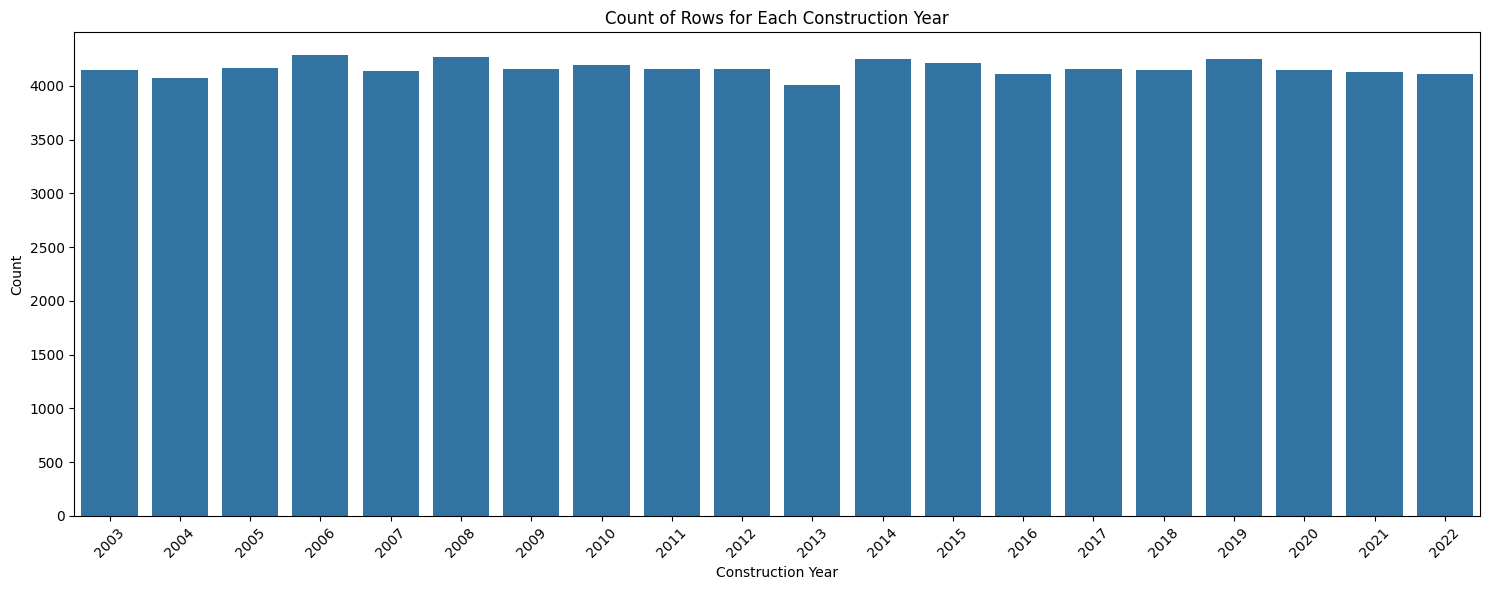

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

year_counts = df1.groupBy("Construction year").count().toPandas()
plt.figure(figsize=(15, 6))
sns.barplot(x="Construction year", y="count", data=year_counts)
plt.xlabel("Construction Year")
plt.ylabel("Count")
plt.title("Count of Rows for Each Construction Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import col, row_number

window_spec = Window.partitionBy("Construction year").orderBy(col("Construction year"))

df1 = df1.withColumn("row_num", row_number().over(window_spec))

df1 = df1.filter(col("row_num") <= 50)

df1 = df1.drop("row_num")

df1.show()


+--------------------+----------------------+-------------------+--------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+
|                NAME|host_identity_verified|neighbourhood group|     lat|     long|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|
+--------------------+----------------------+-------------------+--------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------

In [ ]:
df1.count()

1000

In [ ]:
import requests

In [ ]:
url = "https://airbnb13.p.rapidapi.com/search-geo"

querystring = {"page":"1,2,3,4"}

headers = {
	"x-rapidapi-key": "5a79870c1emsh6a59fac372e4064p134db8jsn5dce15c36591",
	"x-rapidapi-host": "airbnb13.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'error': False, 'headers': {'response_time': 1222, 'response_timestamp': '2024-08-30T14:06:35.416Z', 'response_id': 27709225}, 'results': [{'id': '4604261', 'url': 'https://www.airbnb.com/rooms/4604261', 'deeplink': 'https://www.airbnb.com/rooms/4604261?check_in=&check_out=&adults=1', 'position': 1, 'name': 'Mirror House North', 'bathrooms': 1, 'bedrooms': 1, 'beds': 1, 'city': 'Bolzano', 'images': ['https://a0.muscache.com/im/pictures/miso/Hosting-4604261/original/6645fb7f-74c0-40cf-a6bc-ee90596a4087.jpeg?im_w=720', 'https://a0.muscache.com/im/pictures/miso/Hosting-4604261/original/0f1cc2dc-e63f-4512-9c2a-3566898c0f81.jpeg?im_w=720', 'https://a0.muscache.com/im/pictures/miso/Hosting-4604261/original/4b5d28a8-783e-4734-bbd3-41ef4d0583e5.jpeg?im_w=720', 'https://a0.muscache.com/im/pictures/miso/Hosting-4604261/original/50a54175-8aae-45e2-b558-865f938a7b49.jpeg?im_w=720', 'https://a0.muscache.com/im/pictures/miso/Hosting-4604261/original/9feaa2a6-bce5-4b45-9f88-aeef8d0309bf.jpeg?im_w=72

In [ ]:
import pandas as pd

panda_df = pd.DataFrame(response.json()['results'])

df = spark.createDataFrame(panda_df)

df.show()

+-------------------+--------------------+--------------------+--------+--------------------+---------+--------+----+--------------------+--------------------+--------------------+-----------+--------+------------------+------------------+-------+------------+------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 id|                 url|            deeplink|position|                name|bathrooms|bedrooms|beds|                city|              images|       hostThumbnail|isSuperhost|rareFind|               lat|               lng|persons|reviewsCount|rating|                type|   userId|             address|          amenityIds|    previewAmenities|        cancelPolicy|               price|
+-------------------+--------------------+--------------------+--------+--------------------+---------+--------+----+--------------------+--------------------+--------------------+-----------+

In [ ]:
df.count()

300

In [ ]:
columns_to_drop = ['id', 'url', 'deeplink', 'images', 'hostThumbnail', 'amenityIds', 'previewAmenities', 'cancelPolicy', 'address', 'userId','city','rareFind','isSuperhost']
df = df.drop(*columns_to_drop)
df.show()


+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+--------------------+
|position|                name|bathrooms|bedrooms|beds|               lat|               lng|persons|reviewsCount|rating|                type|               price|
+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+--------------------+
|       1|  Mirror House North|      1.0|       1|   1|          46.46257|          11.31349|      4|         103|  4.88|           Tiny home|{total -> NULL, c...|
|       2|     Chalet  150 sqm|      2.0|       3|   4|          47.41882|           9.83814|      8|         200|  4.97|       Entire chalet|{total -> NULL, c...|
|       3|Villa Naya Opatij...|      6.0|       5|   5|         45.333424|         14.295181|     10|          14|  4.86|        Entire villa|{total -> NULL, c...|
|       4|Sublim

In [ ]:
from pyspark.sql.functions import rand
df = df.withColumn("price", rand()*(1200-50)+50)
df.select(min("price"), max("price")).show()


+------------------+------------------+
|        min(price)|        max(price)|
+------------------+------------------+
|61.798002678566974|1192.8523195400794|
+------------------+------------------+



In [ ]:
df.show()

+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------------------+
|position|                name|bathrooms|bedrooms|beds|               lat|               lng|persons|reviewsCount|rating|                type|             price|
+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------------------+
|       1|  Mirror House North|      1.0|       1|   1|          46.46257|          11.31349|      4|         103|  4.88|           Tiny home| 490.0064442386808|
|       2|     Chalet  150 sqm|      2.0|       3|   4|          47.41882|           9.83814|      8|         200|  4.97|       Entire chalet|1026.1215364834145|
|       3|Villa Naya Opatij...|      6.0|       5|   5|         45.333424|         14.295181|     10|          14|  4.86|        Entire villa|   538.20064370758|
|       4|Sublime Cocoon in.

In [ ]:
from pyspark.sql.functions import round, col

df = df.na.fill({"rating": 5.0})

df = df.withColumn("rating", round(col("rating")))
df.show()

+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------------------+
|position|                name|bathrooms|bedrooms|beds|               lat|               lng|persons|reviewsCount|rating|                type|             price|
+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------------------+
|       1|  Mirror House North|      1.0|       1|   1|          46.46257|          11.31349|      4|         103|   5.0|           Tiny home| 490.0064442386808|
|       2|     Chalet  150 sqm|      2.0|       3|   4|          47.41882|           9.83814|      8|         200|   5.0|       Entire chalet|1026.1215364834145|
|       3|Villa Naya Opatij...|      6.0|       5|   5|         45.333424|         14.295181|     10|          14|   5.0|        Entire villa|   538.20064370758|
|       4|Sublime Cocoon in.

In [ ]:
from pyspark.sql.functions import col

int_cols = ['position', 'bathrooms', 'bedrooms', 'beds', 'persons', 'reviewsCount', 'price', 'rating']
dble_cols = ['lat', 'lng']

for column in int_cols:
    df = df.withColumn(column, col(column).cast("int"))

for column in dble_cols:
    df = df.withColumn(column, col(column).cast("double"))

df.show()


+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+-----+
|position|                name|bathrooms|bedrooms|beds|               lat|               lng|persons|reviewsCount|rating|                type|price|
+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+-----+
|       1|  Mirror House North|        1|       1|   1|          46.46257|          11.31349|      4|         103|     5|           Tiny home|  490|
|       2|     Chalet  150 sqm|        2|       3|   4|          47.41882|           9.83814|      8|         200|     5|       Entire chalet| 1026|
|       3|Villa Naya Opatij...|        6|       5|   5|         45.333424|         14.295181|     10|          14|     5|        Entire villa|  538|
|       4|Sublime Cocoon in...|        1|       1|   2|         45.856007| 6.617877999999999|      4|     

In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+--------+----+---------+--------+----+---+---+-------+------------+------+----+-----+
|position|name|bathrooms|bedrooms|beds|lat|lng|persons|reviewsCount|rating|type|price|
+--------+----+---------+--------+----+---+---+-------+------------+------+----+-----+
|       0|   0|        0|       0|   0|  0|  0|      0|           0|     0|   0|    0|
+--------+----+---------+--------+----+---+---+-------+------------+------+----+-----+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id, col, rand

df_duplicated = df.union(df).union(df)

df_new = df_duplicated.limit(100).withColumn("lat", col("lat") + (rand() - 0.5) * 0.01)\
                                       .withColumn("lng", col("lng") + (rand() - 0.5) * 0.01)\
                                       .withColumn("price", col("price") + (rand() - 0.5) * 10)\
                                       .withColumn("reviewsCount", col("reviewsCount") + (rand() - 0.5) * 5)

df_final = df_duplicated.union(df_new)

df_final = df_final.withColumn("position", monotonically_increasing_id() + 1)

df_final_count = df_final.count()
print(f"Total rows in the final DataFrame: {df_final_count}")

df_final.show()


Total rows in the final DataFrame: 1000
+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------+
|position|                name|bathrooms|bedrooms|beds|               lat|               lng|persons|reviewsCount|rating|                type| price|
+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------+
|       1|  Mirror House North|        1|       1|   1|          46.46257|          11.31349|      4|       103.0|     5|           Tiny home| 490.0|
|       2|     Chalet  150 sqm|        2|       3|   4|          47.41882|           9.83814|      8|       200.0|     5|       Entire chalet|1026.0|
|       3|Villa Naya Opatij...|        6|       5|   5|         45.333424|         14.295181|     10|        14.0|     5|        Entire villa| 538.0|
|       4|Sublime Cocoon in...|        1|       1|   2|     

In [ ]:
df_final = df_final.withColumnRenamed("price", "cost")


In [ ]:
df_final.groupBy(df_final.columns).count().filter("count > 1").show()


+--------+----+---------+--------+----+---+---+-------+------------+------+----+----+-----+
|position|name|bathrooms|bedrooms|beds|lat|lng|persons|reviewsCount|rating|type|cost|count|
+--------+----+---------+--------+----+---+---+-------+------------+------+----+----+-----+
+--------+----+---------+--------+----+---+---+-------+------------+------+----+----+-----+



In [ ]:
df_final.groupBy('cost').count().show()

+------+-----+
|  cost|count|
+------+-----+
| 782.0|    3|
| 311.0|    3|
| 206.0|    3|
| 594.0|    3|
| 365.0|    3|
|1047.0|    6|
| 232.0|    3|
| 348.0|    3|
| 456.0|    3|
| 685.0|    3|
| 317.0|    3|
| 763.0|    3|
| 430.0|    3|
|1015.0|    3|
| 853.0|    3|
| 672.0|   12|
|1026.0|    3|
|1123.0|    3|
| 914.0|    3|
| 797.0|    3|
+------+-----+
only showing top 20 rows



In [ ]:
df1 = df1.drop('NAME', 'lat')

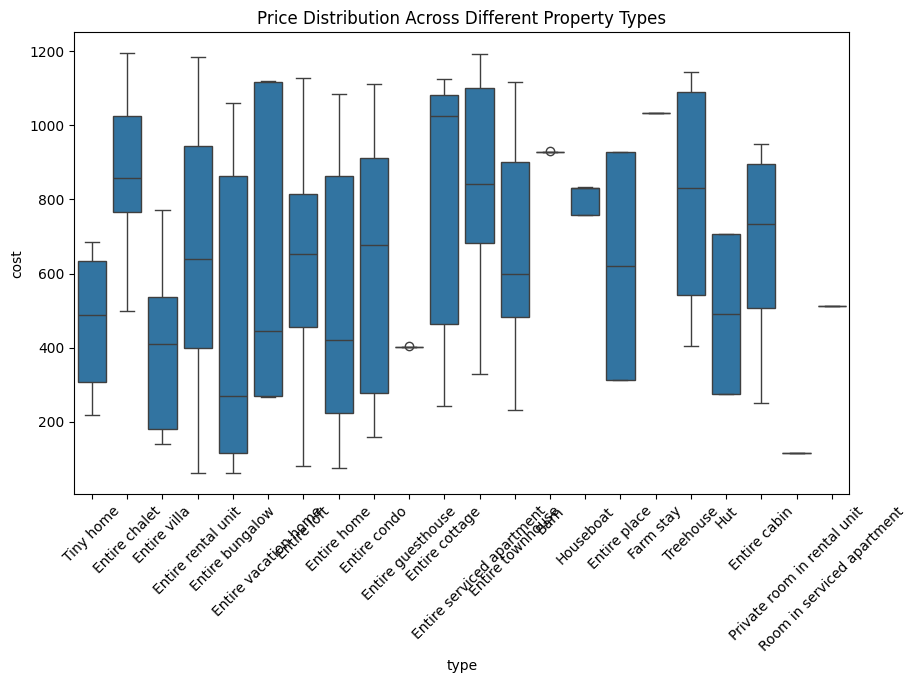

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pandas = df_final.toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pandas, x='type', y='cost')
plt.title('Price Distribution Across Different Property Types')
plt.xticks(rotation=45)
plt.show()


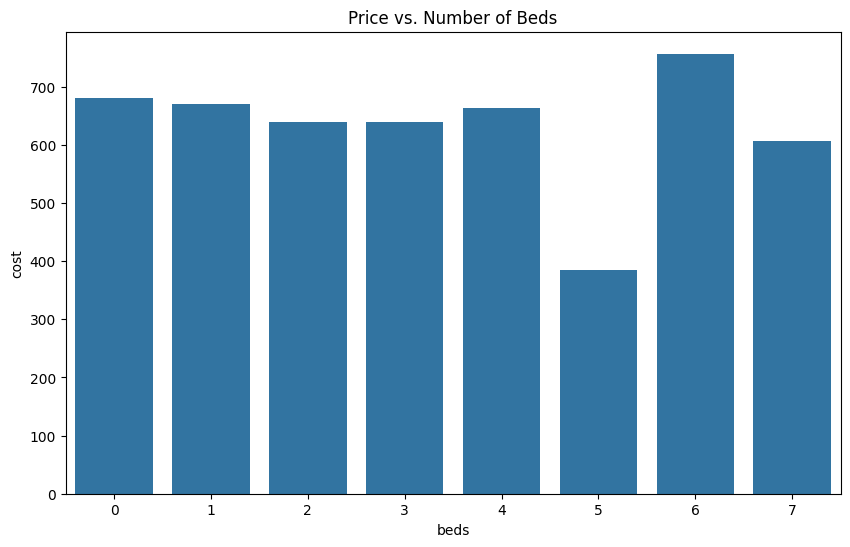

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pandas, x='beds', y='cost', errorbar=None)
plt.title('Price vs. Number of Beds')
plt.show()


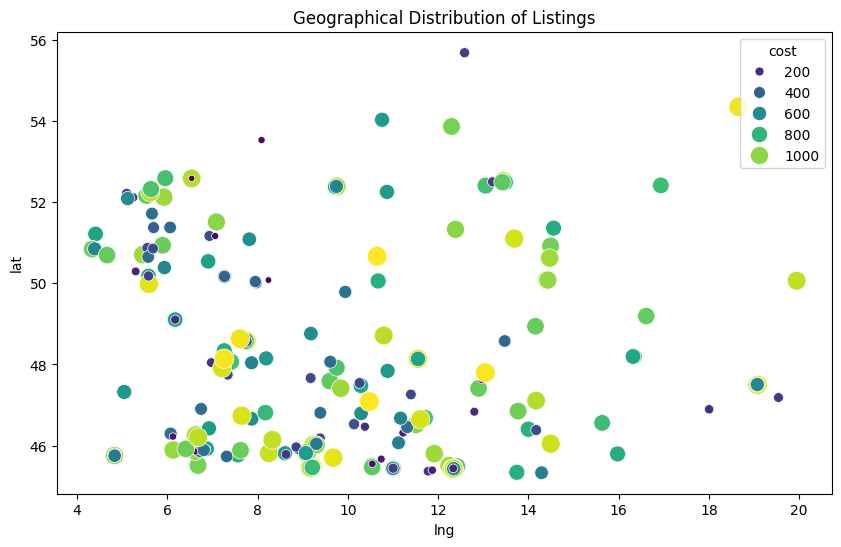

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pandas, x='lng', y='lat', hue='cost', palette='viridis', size='cost', sizes=(20, 200))
plt.title('Geographical Distribution of Listings')
plt.show()


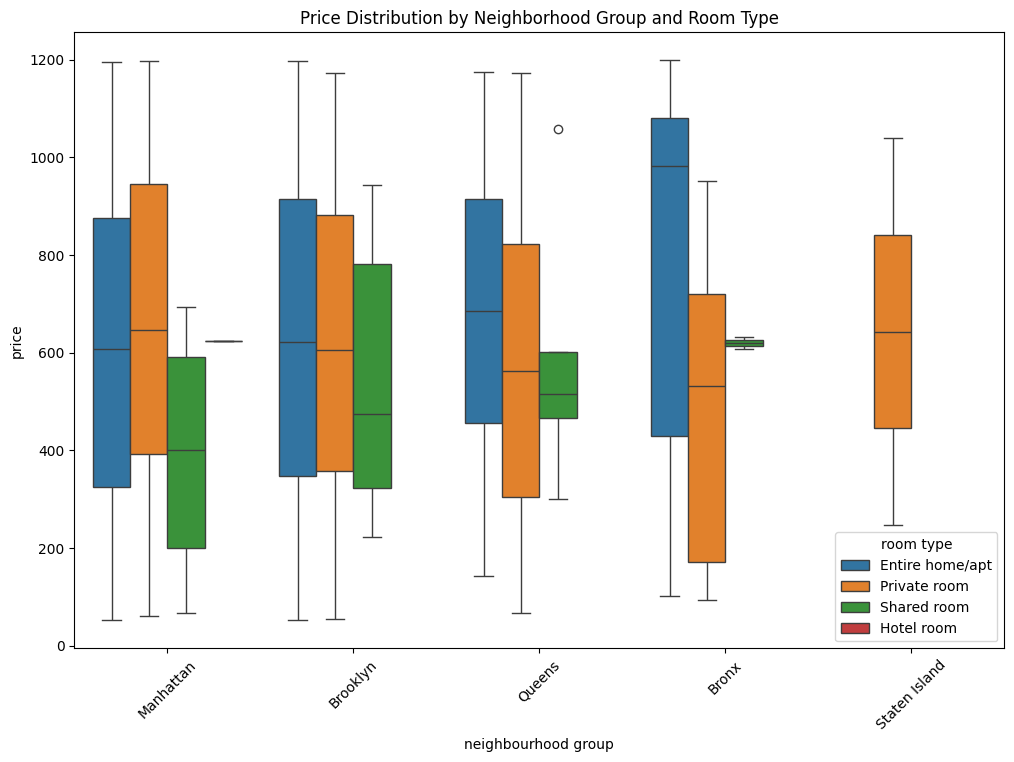

In [ ]:
df_pandas = df1.toPandas()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_pandas, x='neighbourhood group', y='price', hue='room type')
plt.title('Price Distribution by Neighborhood Group and Room Type')
plt.xticks(rotation=45)
plt.show()


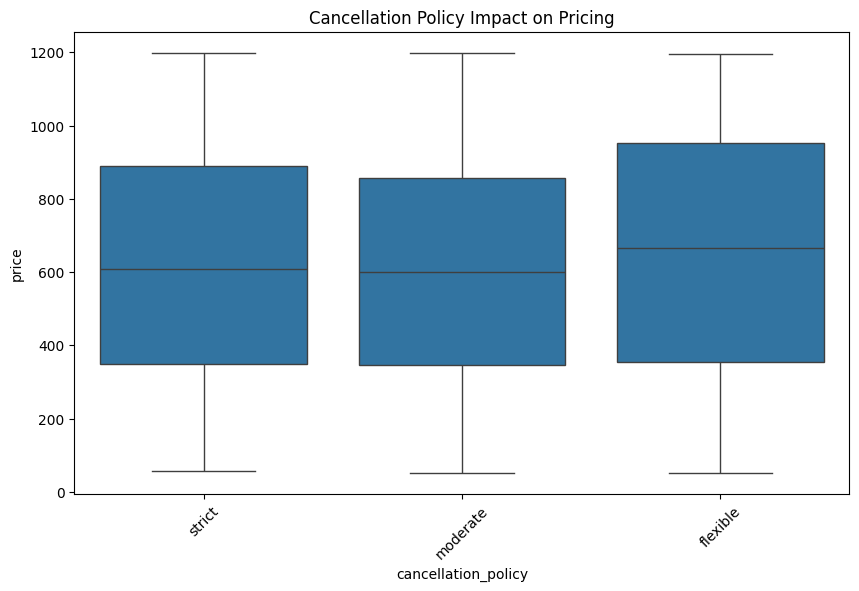

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pandas, x='cancellation_policy', y='price')
plt.title('Cancellation Policy Impact on Pricing')
plt.xticks(rotation=45)
plt.show()


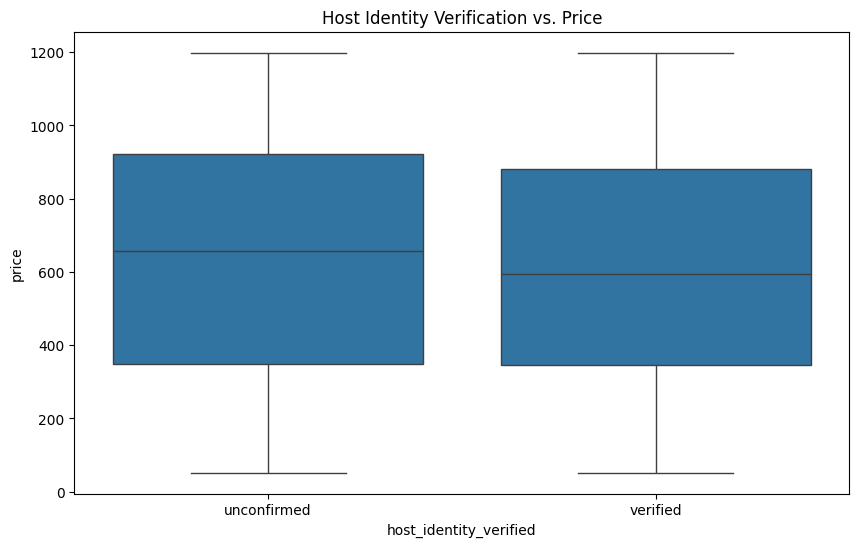

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pandas, x='host_identity_verified', y='price')
plt.title('Host Identity Verification vs. Price')
plt.show()


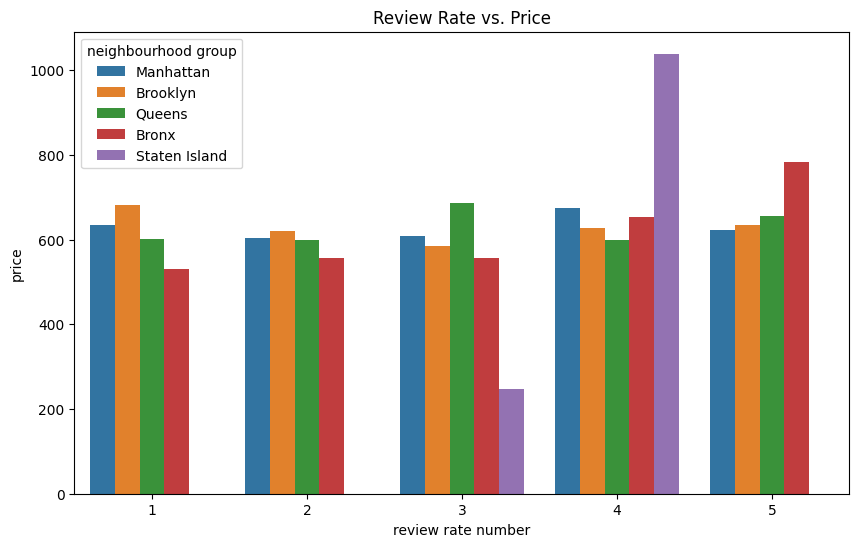

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pandas, x='review rate number', y='price', hue='neighbourhood group', errorbar=None)
plt.title('Review Rate vs. Price')
plt.show()


In [ ]:
df_final.count()

1000

In [ ]:
df1.count()

1000

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

df1_indexed = df1.limit(1000).withColumn("index", monotonically_increasing_id())
df2_indexed = df_final.limit(1000).withColumn("index", monotonically_increasing_id())

combined_df = df1_indexed.join(df2_indexed, on="index").drop("index")

combined_df.show()


+----------------------+-------------------+---------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+--------+--------------------+---------+--------+----+------------------+------------------+-------+------------+------+--------------------+------+
|host_identity_verified|neighbourhood group|     long|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|position|                name|bathrooms|bedrooms|beds|               lat|               lng|persons|reviewsCount|rating|                type|  cost|
+----------------------+-------------------+---------+------------+----------------+----

In [ ]:
combined_df.count()

1000

In [ ]:
from pyspark.sql.functions import col,isnan, when, count
combined_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in combined_df.columns]).show()


+----------------------+-------------------+----+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+-----------+--------+----+---------+--------+----+---+---+-------+------------+------+----+----+
|host_identity_verified|neighbourhood group|long|country code|instant_bookable|cancellation_policy|room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|house_rules|position|name|bathrooms|bedrooms|beds|lat|lng|persons|reviewsCount|rating|type|cost|
+----------------------+-------------------+----+------------+----------------+-------------------+---------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+-----------------------------

In [ ]:
combined_df = combined_df.drop('rating', 'cost', 'position', 'long', 'lng', 'lat','reviewsCount')

In [ ]:
combined_df = combined_df.filter(col("minimum nights") < 100)


In [ ]:

pdf = combined_df.toPandas()


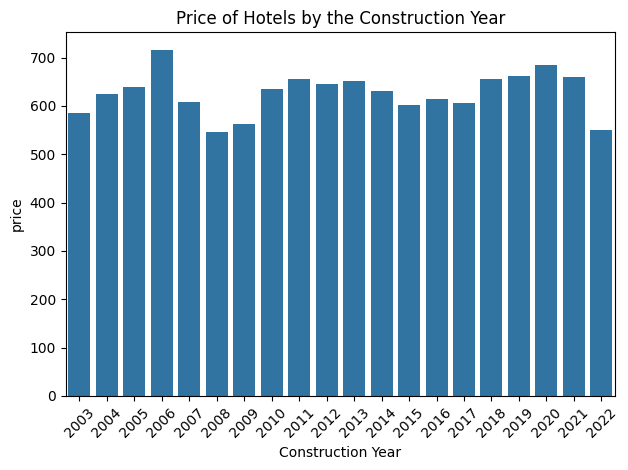

In [ ]:
import seaborn as sns

sns.barplot(x="Construction year", y="price", data=pdf, errorbar = None)
plt.xlabel("Construction Year")
plt.ylabel("price")
plt.title("Price of Hotels by the Construction Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Construction year', ylabel='review rate number'>

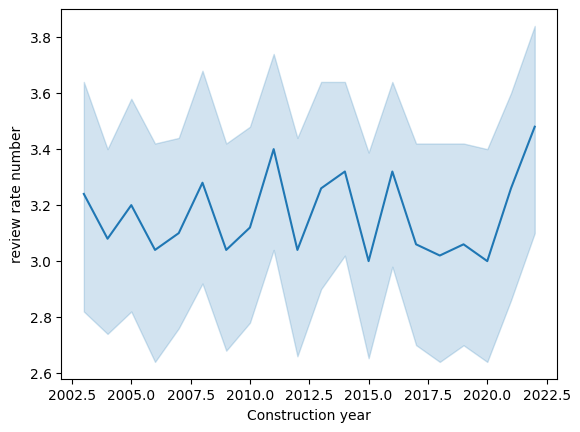

In [ ]:
sns.lineplot(x="Construction year", y="review rate number", data=combined_df.toPandas())


In [ ]:
combined_df.dtypes

[('host_identity_verified', 'string'),
 ('neighbourhood group', 'string'),
 ('country code', 'string'),
 ('instant_bookable', 'string'),
 ('cancellation_policy', 'string'),
 ('room type', 'string'),
 ('Construction year', 'int'),
 ('price', 'int'),
 ('service fee', 'int'),
 ('minimum nights', 'int'),
 ('number of reviews', 'int'),
 ('last review', 'string'),
 ('reviews per month', 'int'),
 ('review rate number', 'int'),
 ('calculated host listings count', 'int'),
 ('availability 365', 'int'),
 ('house_rules', 'string'),
 ('name', 'string'),
 ('bathrooms', 'int'),
 ('bedrooms', 'int'),
 ('beds', 'int'),
 ('persons', 'int'),
 ('type', 'string')]

<Axes: xlabel='price', ylabel='number of reviews'>

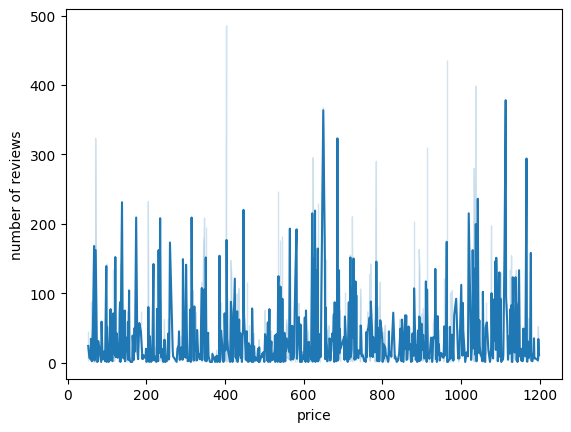

In [ ]:
sns.lineplot(x='price', y='number of reviews', data=pdf)

<Axes: xlabel='price', ylabel='service fee'>

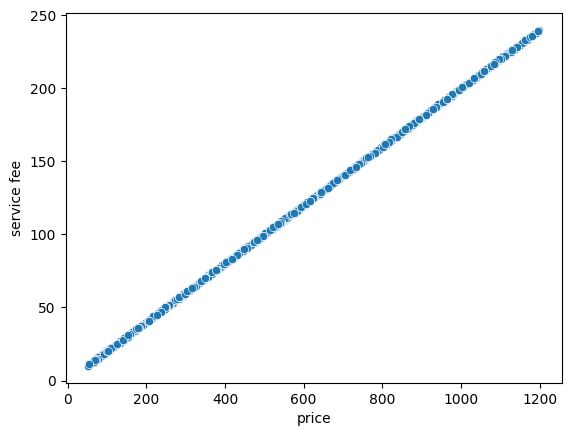

In [ ]:
sns.scatterplot(x='price', y='service fee', data=pdf)

<Axes: xlabel='price', ylabel='minimum nights'>

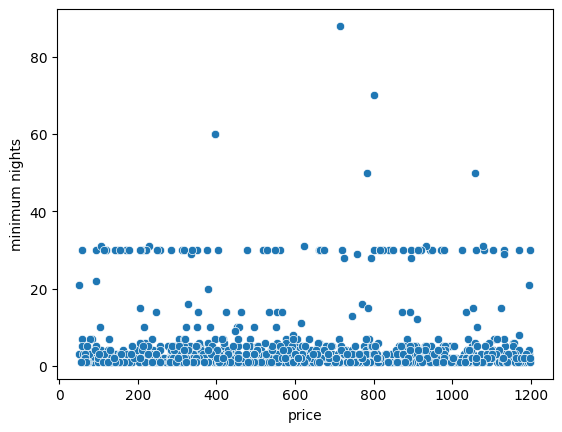

In [ ]:
sns.scatterplot(x='price', y='minimum nights', data=pdf)

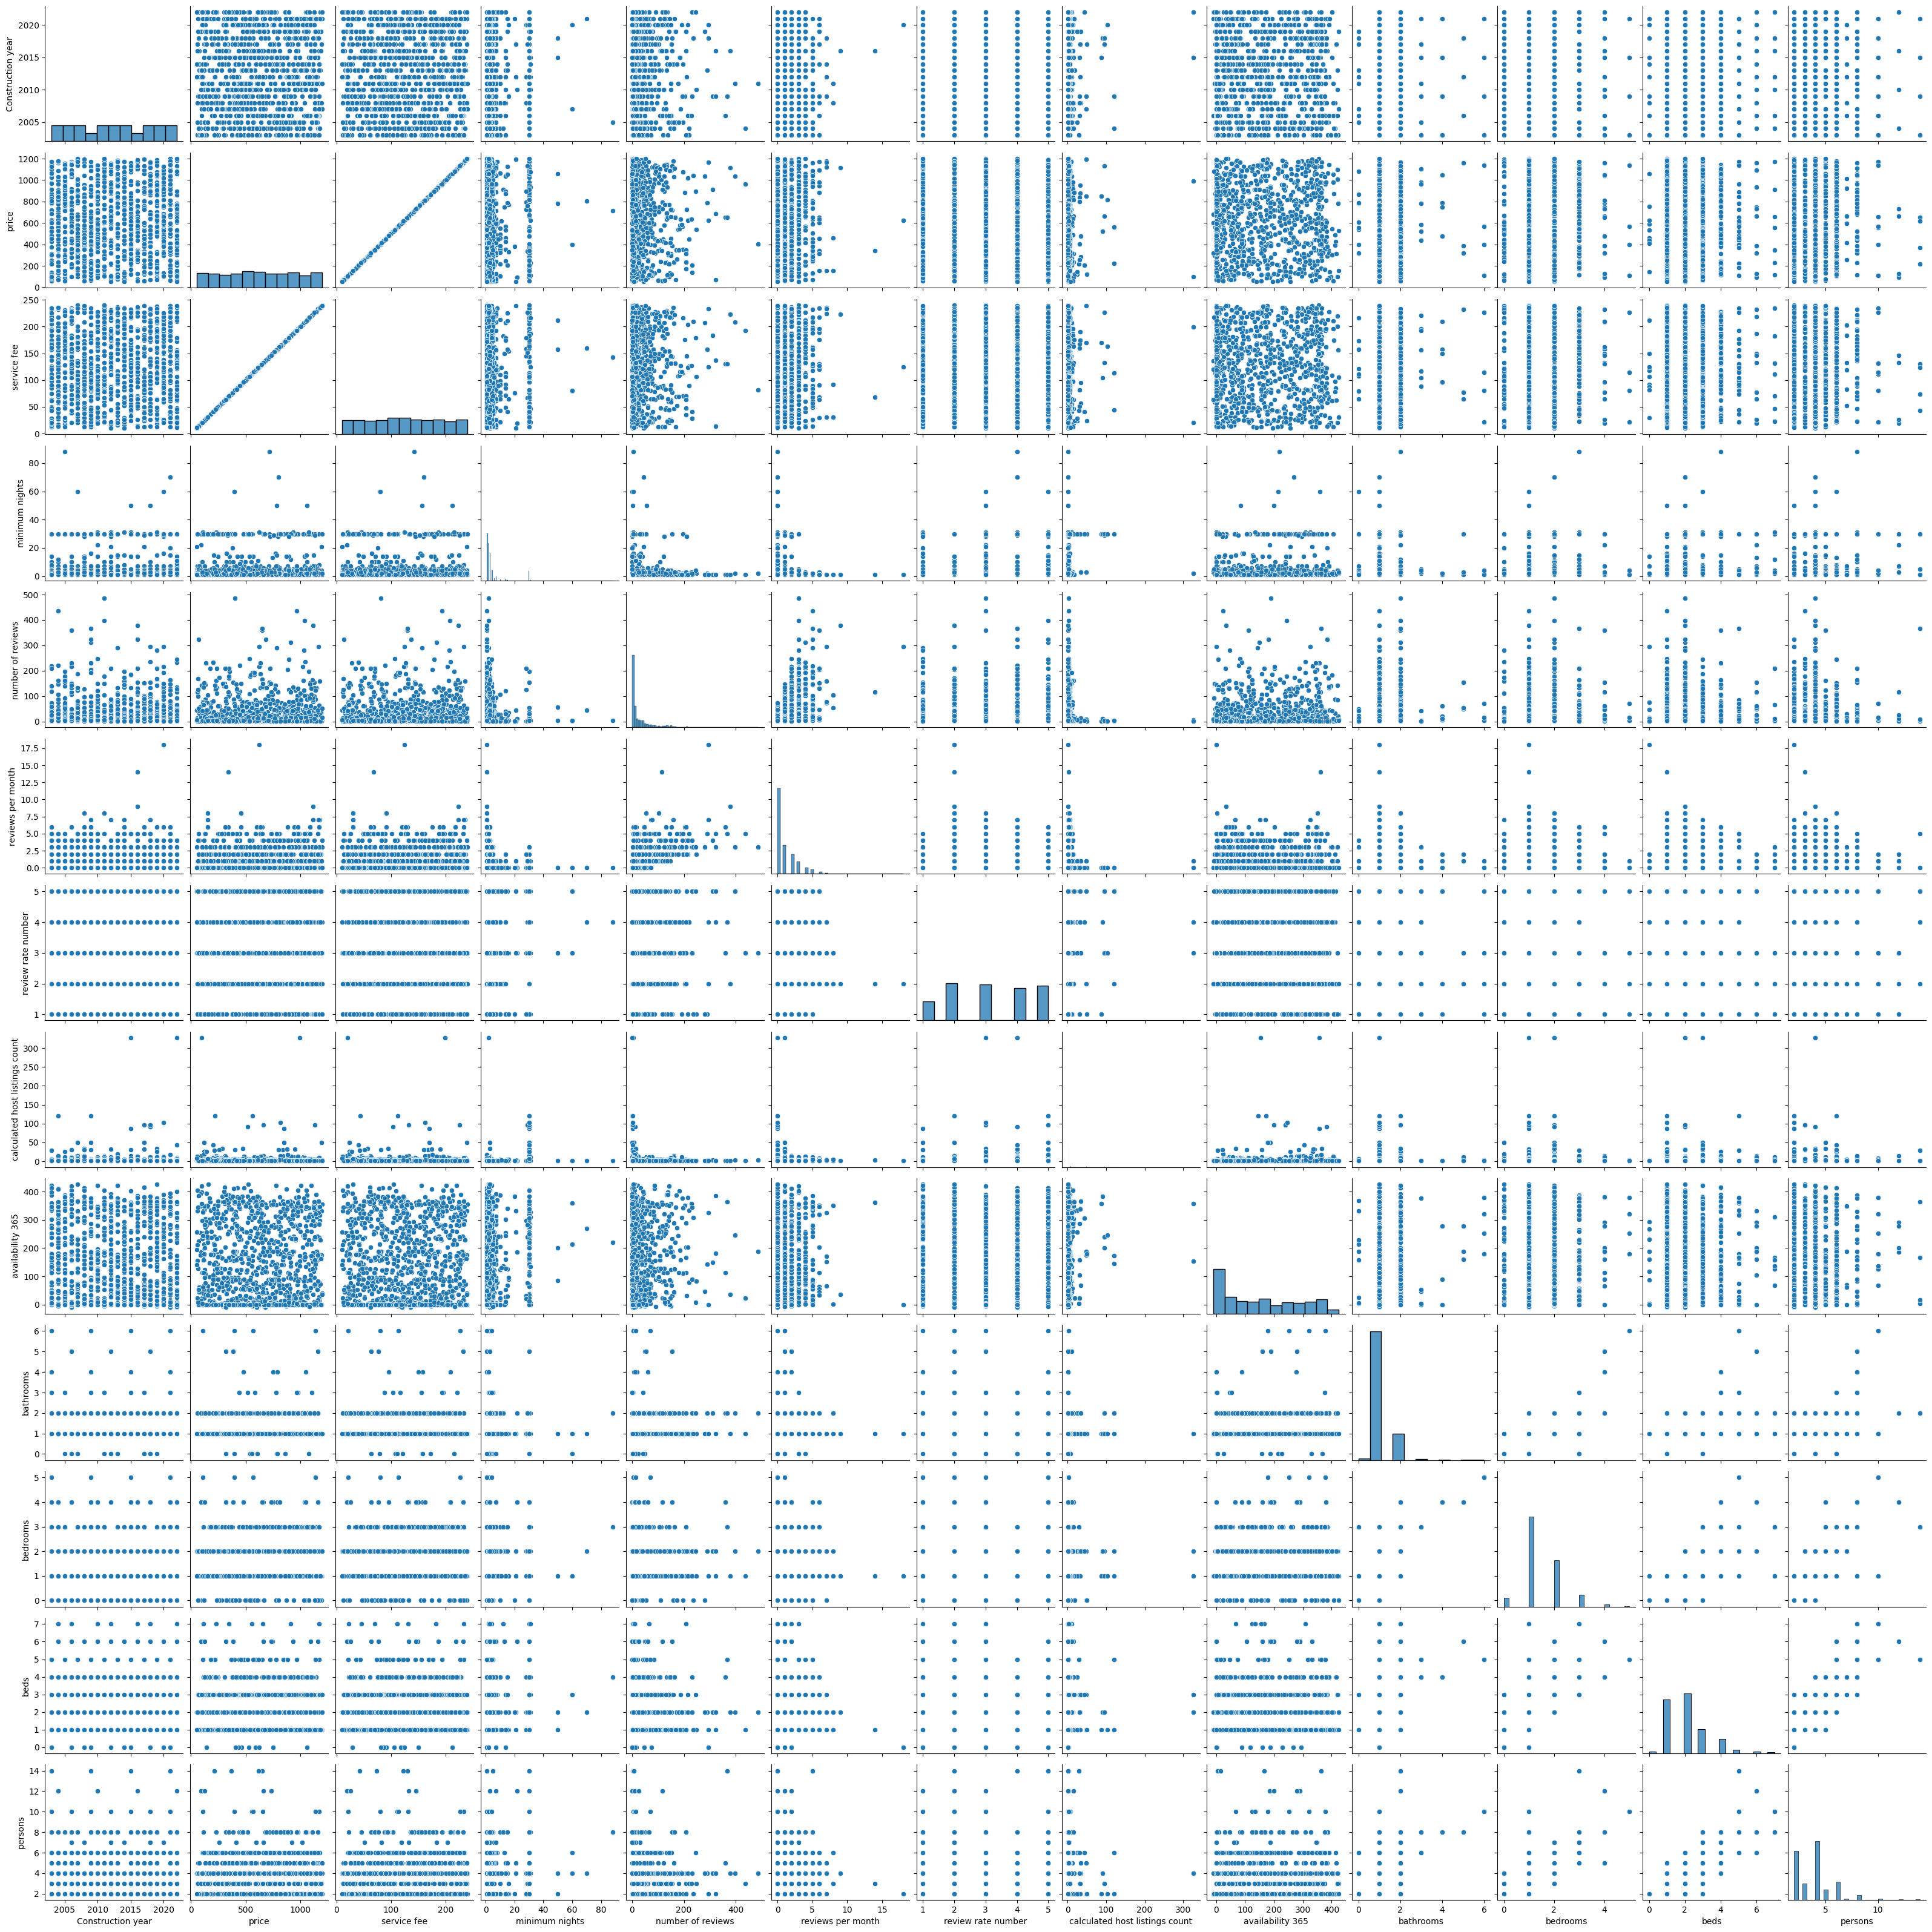

In [ ]:
sns.pairplot(data = pdf)

In [ ]:
end_time1 = time.time()
print("Time for the preparation phase--- %s seconds ---" % (end_time1 - start_time))

Time for the preparation phase--- 306.9599723815918 seconds ---


In [ ]:
start_time2 = time.time()

In [ ]:
combined_df.show()

+----------------------+-------------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+--------------------+---------+--------+----+-------+--------------------+
|host_identity_verified|neighbourhood group|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|                name|bathrooms|bedrooms|beds|persons|                type|
+----------------------+-------------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+----------------------------

In [ ]:
combined_df.dtypes

[('host_identity_verified', 'string'),
 ('neighbourhood group', 'string'),
 ('country code', 'string'),
 ('instant_bookable', 'string'),
 ('cancellation_policy', 'string'),
 ('room type', 'string'),
 ('Construction year', 'int'),
 ('price', 'int'),
 ('service fee', 'int'),
 ('minimum nights', 'int'),
 ('number of reviews', 'int'),
 ('last review', 'string'),
 ('reviews per month', 'int'),
 ('review rate number', 'int'),
 ('calculated host listings count', 'int'),
 ('availability 365', 'int'),
 ('house_rules', 'string'),
 ('name', 'string'),
 ('bathrooms', 'int'),
 ('bedrooms', 'int'),
 ('beds', 'int'),
 ('persons', 'int'),
 ('type', 'string')]

In [ ]:
combined_df.select('host_identity_verified').distinct().show()
combined_df.select('neighbourhood group').distinct().show()
combined_df.select('room type').distinct().show()
combined_df.select('instant_bookable').distinct().show()
combined_df.select('cancellation_policy').distinct().show()
combined_df.select('type').distinct().show()

+----------------------+
|host_identity_verified|
+----------------------+
|           unconfirmed|
|              verified|
+----------------------+

+-------------------+
|neighbourhood group|
+-------------------+
|          Manhattan|
|           Brooklyn|
|             Queens|
|              Bronx|
|      Staten Island|
+-------------------+

+---------------+
|      room type|
+---------------+
|Entire home/apt|
|   Private room|
|    Shared room|
|     Hotel room|
+---------------+

+----------------+
|instant_bookable|
+----------------+
|            TRUE|
|           FALSE|
+----------------+

+-------------------+
|cancellation_policy|
+-------------------+
|             strict|
|           moderate|
|           flexible|
+-------------------+

+--------------------+
|                type|
+--------------------+
|           Tiny home|
|       Entire chalet|
|        Entire villa|
|  Entire rental unit|
|     Entire bungalow|
|Entire vacation home|
|         Entire loft|
|    

In [ ]:
combined_df = combined_df.withColumn('host_identity_verified', when(col('host_identity_verified') == 'unconfirmed', '0').when(col('host_identity_verified') == 'verified',1).otherwise(col('host_identity_verified')))

In [ ]:
combined_df.show()

+----------------------+-------------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+--------------------+---------+--------+----+-------+--------------------+
|host_identity_verified|neighbourhood group|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|                name|bathrooms|bedrooms|beds|persons|                type|
+----------------------+-------------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+----------------------------

In [ ]:
combined_df = combined_df.withColumn(
    "review_rate_category",
    when(combined_df["review rate number"].between(1, 3), "Bad")
    .when(combined_df["review rate number"].between(4, 5), "Good")
)


In [ ]:
combined_df.show()

+----------------------+-------------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+------------------------------+----------------+--------------------+--------------------+---------+--------+----+-------+--------------------+--------------------+
|host_identity_verified|neighbourhood group|country code|instant_bookable|cancellation_policy|      room type|Construction year|price|service fee|minimum nights|number of reviews|last review|reviews per month|review rate number|calculated host listings count|availability 365|         house_rules|                name|bathrooms|bedrooms|beds|persons|                type|review_rate_category|
+----------------------+-------------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+-----

In [ ]:
combined_df = combined_df.drop('last review', 'name', 'house_rules')

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer1 = StringIndexer(inputCol='neighbourhood group', outputCol='neighbourhood group index')
indexer2 = StringIndexer(inputCol='room type', outputCol='room type index')
indexer3 = StringIndexer(inputCol='instant_bookable', outputCol='instant_bookable index')
indexer4 = StringIndexer(inputCol='cancellation_policy', outputCol='cancellation_policy index')
indexer5 = StringIndexer(inputCol='type', outputCol='type index')
indexer6 = StringIndexer(inputCol='host_identity_verified', outputCol='host_identity_verified index')
indexer7 = StringIndexer(inputCol='country code', outputCol='country code index')
indexer8 = StringIndexer(inputCol='review_rate_category', outputCol='review_rate_category index')

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['neighbourhood group index', 'room type index', 'instant_bookable index', 'cancellation_policy index', 'type index', 'host_identity_verified index', 'Construction year', 'price','minimum nights','availability 365','bathrooms','bedrooms','beds','persons'], outputCol='features')

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

lr = LogisticRegression(labelCol='review_rate_category index', featuresCol='features')

In [ ]:
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, indexer5, indexer6, indexer8, assembler,lr])

In [ ]:
train_data, test_data = combined_df.randomSplit([0.8, 0.2])

model = pipeline.fit(train_data)

import psutil

cpu = psutil.cpu_percent()
cpu_usage = f"{cpu}%"
print('The CPU necessary to run this program is: ---',cpu_usage,'---')

ram = psutil.virtual_memory().percent
ram_usage = f"{ram}%"
print('The RAM necessary to run this program is: ---',ram_usage,'---')

rom = psutil.disk_usage('/').percent
rom_usage = f"{rom}%"
print('The ROM necessary to run this program is: ---',rom_usage,'---')


The CPU necessary to run this program is: --- 23.9% ---
The RAM necessary to run this program is: --- 26.3% ---
The ROM necessary to run this program is: --- 31.5% ---


In [ ]:
predictions = model.transform(test_data)
predictions.select('review_rate_category index', 'prediction').show()

+--------------------------+----------+
|review_rate_category index|prediction|
+--------------------------+----------+
|                       0.0|       0.0|
|                       0.0|       0.0|
|                       0.0|       0.0|
|                       1.0|       0.0|
|                       1.0|       1.0|
|                       0.0|       0.0|
|                       1.0|       1.0|
|                       0.0|       0.0|
|                       0.0|       0.0|
|                       0.0|       0.0|
|                       0.0|       0.0|
|                       0.0|       0.0|
|                       1.0|       0.0|
|                       0.0|       0.0|
|                       1.0|       0.0|
|                       1.0|       0.0|
|                       1.0|       1.0|
|                       0.0|       0.0|
|                       1.0|       0.0|
|                       1.0|       0.0|
+--------------------------+----------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

evaluator1 = BinaryClassificationEvaluator(labelCol='review_rate_category index', rawPredictionCol='rawPrediction', metricName='areaUnderROC')
accuracy = evaluator1.evaluate(predictions)

evaluator2 = BinaryClassificationEvaluator(labelCol='review_rate_category index', rawPredictionCol='rawPrediction', metricName='areaUnderPR')
precision = evaluator2.evaluate(predictions)

evaluator3 = MulticlassClassificationEvaluator(labelCol='review_rate_category index', predictionCol='prediction', metricName='accuracy')
recall = evaluator3.evaluate(predictions)

evaluator4 = MulticlassClassificationEvaluator(labelCol='review_rate_category index', predictionCol='prediction', metricName='f1')
f1_score = evaluator4.evaluate(predictions)

evaluator5 = MulticlassClassificationEvaluator(labelCol='review_rate_category index', predictionCol='prediction', metricName='weightedPrecision')
weightedPrecision = evaluator5.evaluate(predictions)

evaluator6 = MulticlassClassificationEvaluator(labelCol='review_rate_category index', predictionCol='prediction', metricName='weightedRecall')
weightedRecall = evaluator6.evaluate(predictions)

print("Metrics:")
print("Area Under ROC Curve:", accuracy)
print("Area Under Precision-Recall Curve:", precision)
print("Accuracy:", recall)
print("F1 Score:", f1_score)
print("Weighted Precision:", weightedPrecision)
print("Weighted Recall:", weightedRecall)



Accuracy: 0.5572916666666666
Precision: 0.6017045454545455
Recall: 0.5572916666666667
F1 Score: 0.49111426222124455


In [ ]:
predictions.select('review_rate_category index').filter(predictions['review_rate_category index'].isNull()).show()


In [ ]:
end_time2 = time.time()
print("Time for the modeling phase--- %s seconds ---" % (end_time2 - start_time2))

Time for the modeling phase--- 181.5155749320984 seconds ---


In [ ]:
print("Total time--- %s seconds ---" % (end_time2 - start_time))

Total time--- 488.4870765209198 seconds ---
